In [25]:
! pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Janith\AppData\Local\Temp\ipykernel_31136\183305629.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)



Testing Results:
1st Hour Prediction Accuracy: 95.89%, MAE: 0.0811
2nd Hour Prediction Accuracy: 92.57%, MAE: 0.1456
3rd Hour Prediction Accuracy: 89.69%, MAE: 0.2026

Sample Predictions vs Actual Values:
      Actual 1st Hour  Predicted 1st Hour  Actual 2nd Hour  \
800              0.15            0.134331             0.17   
1172             0.77            0.756515             0.82   
4979             2.71            2.737804             2.81   
1061             1.80            1.878087             1.70   
2663             2.23            2.239906             2.18   
746              0.26            0.253662             0.25   
1743             1.22            1.275058             1.22   
5101             3.34            3.488683             3.41   
864              0.23            0.242517             0.22   
4248             1.89            1.878087             1.89   

      Predicted 2nd Hour  Actual 3rd Hour  Predicted 3rd Hour  
800             0.141628             0.19      

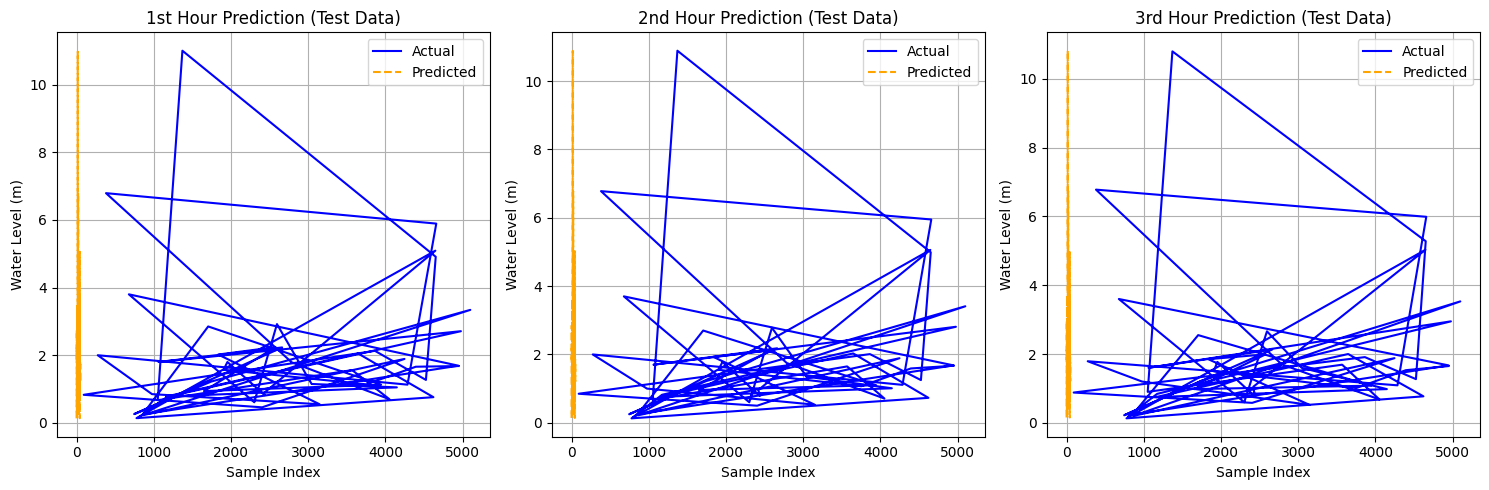

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import xgboost as xgb

# Load the dataset
file_path = "F:/FYP project/FYP(Flood)/Real Data/Flood_fyp_data.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Handle NaN values using forward-fill
data.fillna(method='ffill', inplace=True)

# Drop 'Date' and 'Hour' columns if they exist
data = data.drop(columns=['Date', 'Hour'], errors='ignore')

# Define input features (X) and target values (y)
X = data[['Discharge Rate (cumecs)', 'Rainfall Data (mm)', 'Water Level (m)']]
y = data[['Next 1 Hour Water Level (m)', 'Next 2 Hours Water Level (m)', 'Next 3 Hours Water Level (m)']]

# Normalize the input features
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

# Split dataset into training (70%), validation (15%), and testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train an XGBoost model for each target variable
models = {}
y_pred = {}
for i, target in enumerate(y.columns):
    models[target] = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
    models[target].fit(X_train, y_train.iloc[:, i])
    y_pred[target] = models[target].predict(X_test)

# Convert predictions into a DataFrame
y_test_pred = pd.DataFrame(y_pred).values

# Function to calculate accuracy as a percentage
def calculate_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # MAPE in percentage
    accuracy = 100 - mape  # Accuracy in percentage
    return accuracy

# Calculate accuracy and MAE for each hour
accuracy_1st_hour = calculate_accuracy(y_test.iloc[:, 0], y_test_pred[:, 0])
mae_1st_hour = mean_absolute_error(y_test.iloc[:, 0], y_test_pred[:, 0])

accuracy_2nd_hour = calculate_accuracy(y_test.iloc[:, 1], y_test_pred[:, 1])
mae_2nd_hour = mean_absolute_error(y_test.iloc[:, 1], y_test_pred[:, 1])

accuracy_3rd_hour = calculate_accuracy(y_test.iloc[:, 2], y_test_pred[:, 2])
mae_3rd_hour = mean_absolute_error(y_test.iloc[:, 2], y_test_pred[:, 2])

# Print accuracies and MAE
print("\nTesting Results:")
print(f"1st Hour Prediction Accuracy: {accuracy_1st_hour:.2f}%, MAE: {mae_1st_hour:.4f}")
print(f"2nd Hour Prediction Accuracy: {accuracy_2nd_hour:.2f}%, MAE: {mae_2nd_hour:.4f}")
print(f"3rd Hour Prediction Accuracy: {accuracy_3rd_hour:.2f}%, MAE: {mae_3rd_hour:.4f}")

# Display some sample predictions vs actual values
print("\nSample Predictions vs Actual Values:")
sample_data = pd.DataFrame({
    'Actual 1st Hour': y_test.iloc[:, 0],
    'Predicted 1st Hour': y_test_pred[:, 0],
    'Actual 2nd Hour': y_test.iloc[:, 1],
    'Predicted 2nd Hour': y_test_pred[:, 1],
    'Actual 3rd Hour': y_test.iloc[:, 2],
    'Predicted 3rd Hour': y_test_pred[:, 2],
})
print(sample_data.head(10))

# Visualization: True vs Predicted values for all 3 targets
plt.figure(figsize=(15, 5))
for i, target in enumerate(['1st Hour', '2nd Hour', '3rd Hour']):
    plt.subplot(1, 3, i+1)
    plt.plot(y_test.iloc[:50, i], label='Actual', color='blue')
    plt.plot(y_test_pred[:50, i], label='Predicted', color='orange', linestyle='--')
    plt.title(f'{target} Prediction (Test Data)')
    plt.xlabel('Sample Index')
    plt.ylabel('Water Level (m)')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Janith\AppData\Local\Temp\ipykernel_31136\54328426.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
c:\Users\Janith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8.4173 - val_loss: 1.8629
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4116 - val_loss: 0.3678
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3172 - val_loss: 0.2301
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2137 - val_loss: 0.1652
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1539 - val_loss: 0.1218
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1146 - val_loss: 0.0942
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0908 - val_loss: 0.0795
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0785 - val_loss: 0.0730
Epoch 9/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0730 - val_loss: 0.0705
Epoch 10/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0707 - val_loss: 0.0697
Epoch 11/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0697 - val_loss: 0.0694
Epoch 12/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

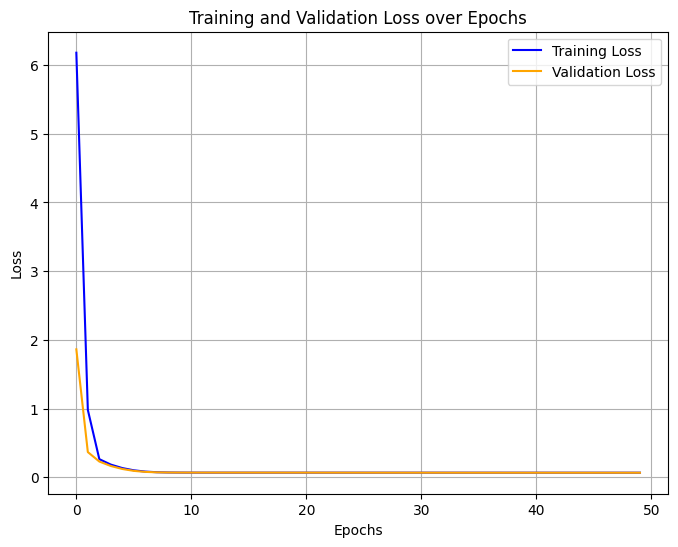

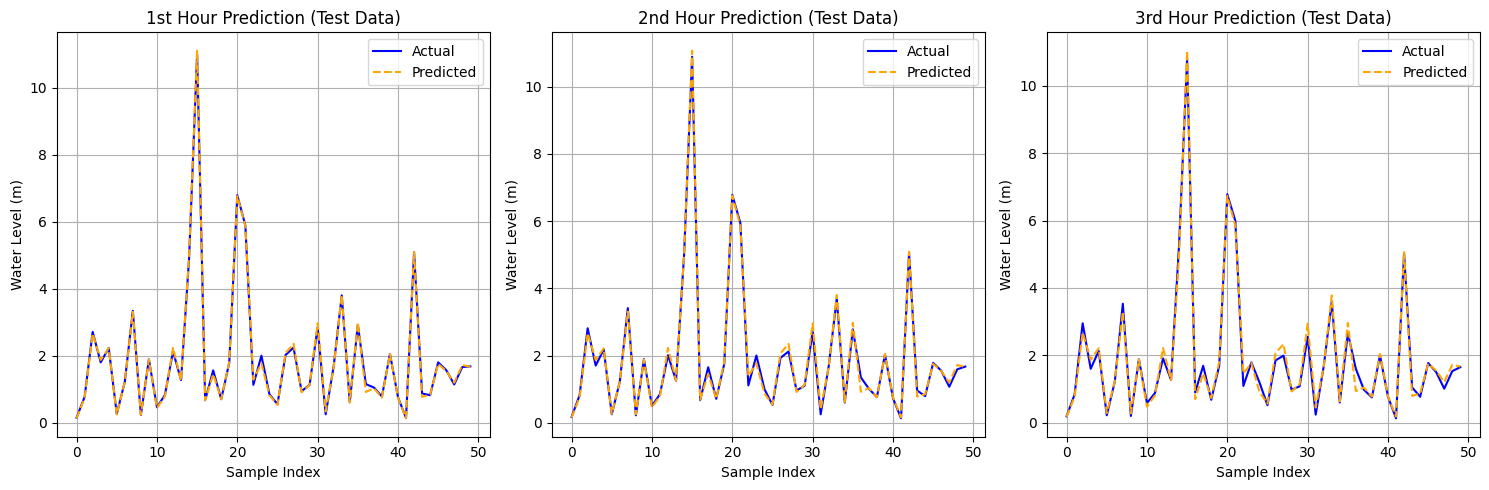

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
file_path = "F:/FYP project/FYP(Flood)/Real Data/Flood_fyp_data.csv"  # Replace with your actual path
data = pd.read_csv(file_path)

# Handle NaN values using forward-fill
data.fillna(method='ffill', inplace=True)

# Drop 'Date' and 'Hour' columns if they exist
data = data.drop(columns=['Date', 'Hour'], errors='ignore')

# Define input features (X) and target values (y)
X = data[['Discharge Rate (cumecs)', 'Rainfall Data (mm)', 'Water Level (m)']].values
y = data[['Next 1 Hour Water Level (m)', 'Next 2 Hours Water Level (m)', 'Next 3 Hours Water Level (m)']].values

# Normalize the input features
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

# Reshape data to be 3D for LSTM input
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))  # (samples, time steps, features)

# Split dataset into training (70%), validation (15%), and testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(units=64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=3))  # 3 outputs (1st, 2nd, 3rd hour predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Function to calculate accuracy as a percentage
def calculate_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # MAPE in percentage
    accuracy = 100 - mape  # Accuracy in percentage
    return accuracy

# Calculate accuracy and MAE for each hour
accuracy_1st_hour = calculate_accuracy(y_test[:, 0], y_test_pred[:, 0])
mae_1st_hour = mean_absolute_error(y_test[:, 0], y_test_pred[:, 0])

accuracy_2nd_hour = calculate_accuracy(y_test[:, 1], y_test_pred[:, 1])
mae_2nd_hour = mean_absolute_error(y_test[:, 1], y_test_pred[:, 1])

accuracy_3rd_hour = calculate_accuracy(y_test[:, 2], y_test_pred[:, 2])
mae_3rd_hour = mean_absolute_error(y_test[:, 2], y_test_pred[:, 2])

# Print results
print("\nTesting Results:")
print(f"1st Hour Prediction Accuracy: {accuracy_1st_hour:.2f}%, MAE: {mae_1st_hour:.4f}")
print(f"2nd Hour Prediction Accuracy: {accuracy_2nd_hour:.2f}%, MAE: {mae_2nd_hour:.4f}")
print(f"3rd Hour Prediction Accuracy: {accuracy_3rd_hour:.2f}%, MAE: {mae_3rd_hour:.4f}")

# Display sample predictions vs actual values
print("\nSample Predictions vs Actual Values:")
sample_data = pd.DataFrame({
    'Actual 1st Hour': y_test[:, 0],
    'Predicted 1st Hour': y_test_pred[:, 0],
    'Actual 2nd Hour': y_test[:, 1],
    'Predicted 2nd Hour': y_test_pred[:, 1],
    'Actual 3rd Hour': y_test[:, 2],
    'Predicted 3rd Hour': y_test_pred[:, 2],
})
print(sample_data.head(10))

# Visualization: Training loss vs Validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Visualization: True vs Predicted values for all 3 targets
plt.figure(figsize=(15, 5))
for i, target in enumerate(['1st Hour', '2nd Hour', '3rd Hour']):
    plt.subplot(1, 3, i+1)
    plt.plot(y_test[:50, i], label='Actual', color='blue')
    plt.plot(y_test_pred[:50, i], label='Predicted', color='orange', linestyle='--')
    plt.title(f'{target} Prediction (Test Data)')
    plt.xlabel('Sample Index')
    plt.ylabel('Water Level (m)')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
# Print results
print("\nTesting Results:")
print(f"1st Hour Prediction Accuracy: {accuracy_1st_hour:.2f}%, MAE: {mae_1st_hour:.4f}")
print(f"2nd Hour Prediction Accuracy: {accuracy_2nd_hour:.2f}%, MAE: {mae_2nd_hour:.4f}")
print(f"3rd Hour Prediction Accuracy: {accuracy_3rd_hour:.2f}%, MAE: {mae_3rd_hour:.4f}")


Testing Results:
1st Hour Prediction Accuracy: 96.39%, MAE: 0.0703
2nd Hour Prediction Accuracy: 93.80%, MAE: 0.1306
3rd Hour Prediction Accuracy: 90.73%, MAE: 0.1901
